In [114]:
# Load libraries
import pandas as pd
import numpy as np
# import data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# Date
from datetime import datetime

In [2]:
education = pd.read_csv('data sources/ex6-2/education.csv')
education.shape

(52, 7)

In [9]:
unemployment = pd.read_csv('data sources/unemployement-rate-1948-2010.csv')
unemployment.shape

(746, 4)

In [75]:
orders = pd.read_csv('data sources/Order Details.csv')
target = pd.read_csv('data sources/Sales target.csv')
details = pd.read_csv('data sources/List of Orders.csv')

## Python - Histogram

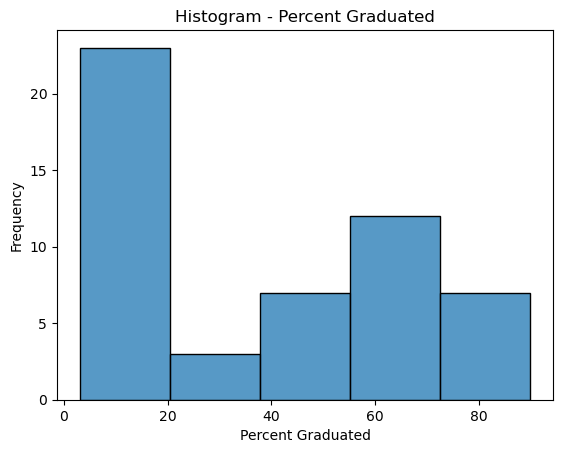

In [6]:
sns.histplot(data=education, x="percent_graduates_sat", bins=5)
plt.title('Histogram - Percent Graduated')
plt.xlabel('Percent Graduated')
plt.ylabel('Frequency')
plt.show()

## Python - Box Plot

In [12]:
# Find decade for year
unemployment['decade'] = np.floor(unemployment['Year']/10)*10
# Convert to int
unemployment['decade'] = unemployment['decade'].astype(int)

In [32]:
# Group by decade and filter
unemployment_decade = unemployment.groupby(['decade', 'Year'])['Value'].mean().reset_index(name='value')
unemp_year = unemployment_decade[(unemployment_decade.Year >= 1960) & (unemployment_decade.Year <= 2009)]

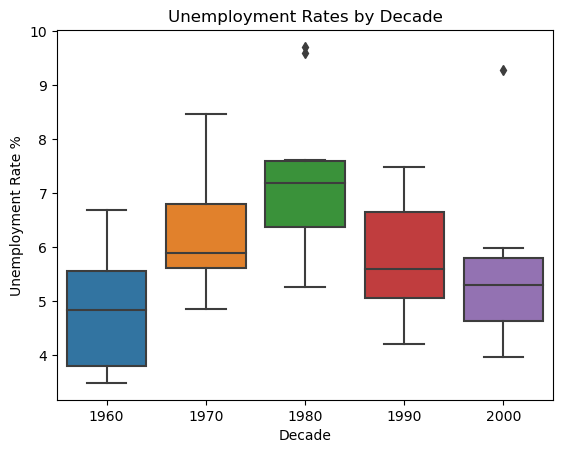

In [43]:
sns.boxplot(data=unemp_year, x="decade", y="value")
plt.title('Unemployment Rates by Decade')
plt.xlabel('Decade')
plt.ylabel('Unemployment Rate %')
plt.show()

## Python - Bullet Chart

In [76]:
# Convert string to dates
target['Month of Order Date'] = pd.to_datetime(target['Month of Order Date'], format='%b-%y')
details['Order Date'] = pd.to_datetime(details['Order Date'], format='%d-%m-%Y')

In [77]:
# Filter to 2018 and group by category
target = target[(target['Month of Order Date'] >= '2018-01-01') & (target['Month of Order Date'] <= '2018-12-01')]
target = target.groupby(['Category'])['Target'].sum().reset_index(name='target')

In [80]:
# Filter to 2018 and group by category
details = details[(details['Order Date'] >= '2018-01-01') & (details['Order Date'] <= '2018-12-31')]

In [86]:
# Group order amount by category
details = details[(details['Order Date'] >= '2018-01-01') & (details['Order Date'] <= '2018-12-31')]
orders = orders[orders['Order ID'].isin(details['Order ID'])]
orders = orders.groupby(['Category'])['Amount'].sum().reset_index(name='amount')

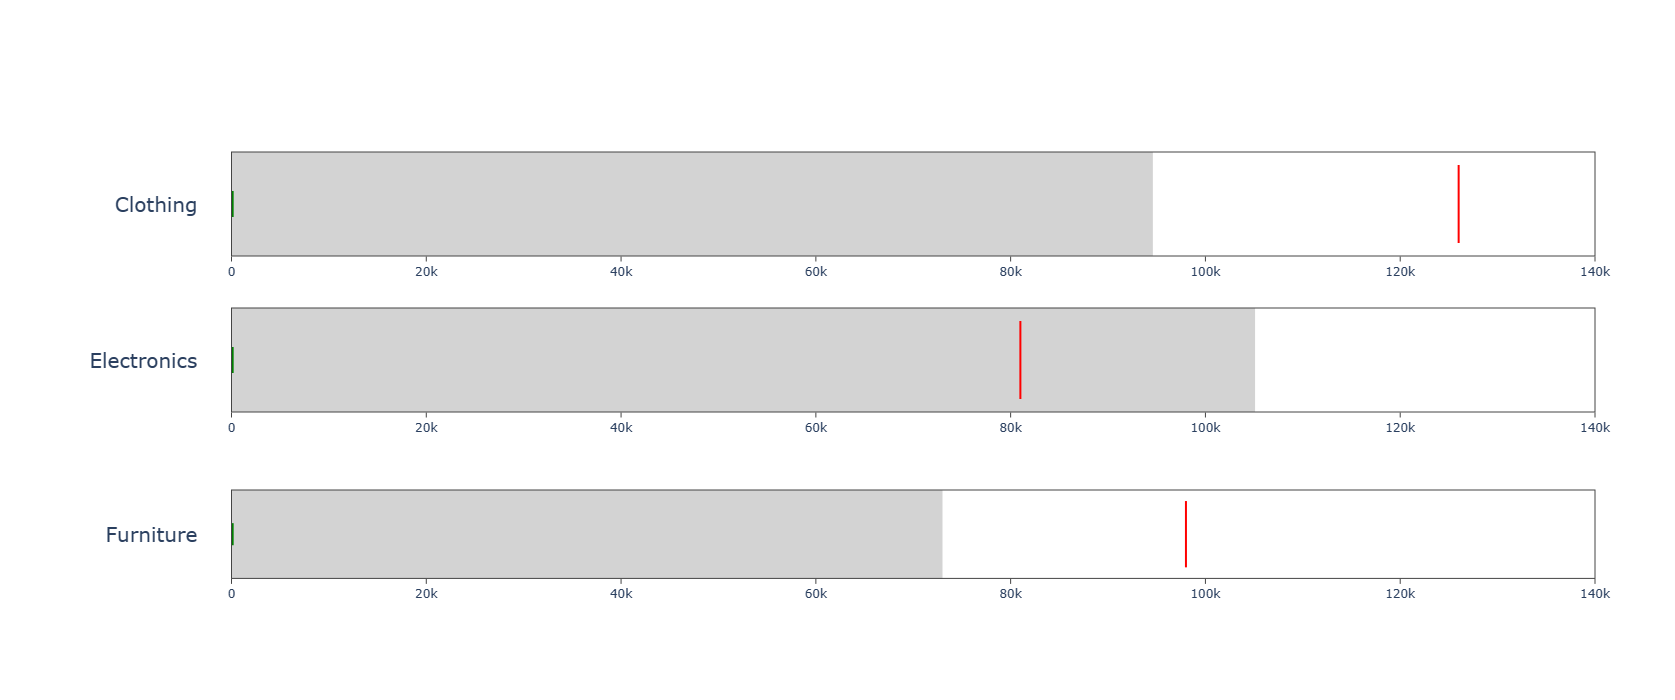

In [142]:
# Create bullet chart
fig = go.Figure()

fig.add_trace(go.Indicator(
        mode = "gauge", value = 220,
        domain = {'x': [0.1, 1], 'y': [0.08, 0.25]},
        title = {'text' : orders['Category'][2]},
        delta = {'reference': 200},
        gauge = {
            'shape': "bullet",
            'axis': {'range': [None, 140000]},
            'threshold': {
                'line': {'color': "red", 'width': 2},
                'thickness': 0.75,
                'value': target['target'][2]},
            'steps': [
                {'range': [0, orders['amount'][2]], 'color': "lightgray"}]}))
    
fig.add_trace(go.Indicator(
        mode = "gauge", value = 220,
        domain = {'x': [0.1, 1], 'y': [0.4, 0.6]},
        title = {'text' : orders['Category'][1]},
        delta = {'reference': 200},
        gauge = {
            'shape': "bullet",
            'axis': {'range': [None, 140000]},
            'threshold': {
                'line': {'color': "red", 'width': 2},
                'thickness': 0.75,
                'value': target['target'][1]},
            'steps': [
                {'range': [0, orders['amount'][1]], 'color': "lightgray"}]}))

fig.add_trace(go.Indicator(
        mode = "gauge", value = 220,
        domain = {'x': [0.1, 1], 'y': [0.7, 0.9]},
        title = {'text' : orders['Category'][0]},
        delta = {'reference': 200},
        gauge = {
            'shape': "bullet",
            'axis': {'range': [None, 140000]},
            'threshold': {
                'line': {'color': "red", 'width': 2},
                'thickness': 0.75,
                'value': target['target'][0]},
            'steps': [
                {'range': [0, orders['amount'][0]], 'color': "lightgray"}]}))

fig.update_layout(height = 1200)
fig.show()